### MNIST Result Exploration
Purpose of this notebook:
- Find out if there are configurations for which one framework is resilient and another isn't
- Find out if there are configuration for which both frameworks have high accuracy, but low resiliency

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
results = pd.read_csv("../../singularity_singlegpu_mnist_10trials_11-13_fixed.csv")

In [43]:
len(results)

60

In [44]:
results.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,968bca94,0.668980,0.662559,0.663033,0.663895,0.021294,0.7125,0.704696,0.705324,0.707328,...,thetagpu16,140.221.68.26,383.802915,0,2,"1_batch_size=272,dropout=0.59139,epochs=100,le...",0.073637,0.591388,100,272
1,9690d96c,0.540617,0.533194,0.533907,0.535499,0.008178,0.7182,0.711530,0.712088,0.713206,...,thetagpu16,140.221.68.26,349.411131,0,2,"2_batch_size=272,dropout=0.63442,epochs=85,lea...",0.075015,0.634419,85,272
2,96928b86,0.103250,0.103250,0.103250,0.103242,0.101554,0.0974,0.097320,0.097320,0.097320,...,thetagpu16,140.221.68.26,1552.872710,0,2,"3_batch_size=39,dropout=0.88244,epochs=67,lear...",0.093024,0.882444,67,39
3,96948832,0.604454,0.597602,0.598358,0.600513,0.028806,0.5578,0.548881,0.549618,0.552646,...,thetagpu16,140.221.68.26,332.862100,0,2,"4_batch_size=246,dropout=0.80187,epochs=59,lea...",0.051048,0.801873,59,246
4,9696b9d6,0.706907,0.700260,0.700776,0.700499,0.021722,0.6662,0.658296,0.659155,0.660117,...,thetagpu16,140.221.68.26,561.345086,0,2,"5_batch_size=142,dropout=0.51328,epochs=100,le...",0.069690,0.513280,100,142


In [80]:
results['tf_spatial_accuracy'].min()

0.0

In [64]:
sorted_results = results.sort_values('average_res', ascending=False)

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
sorted_results.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,tf_spatial_accuracy,average_res,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff
59,fe32ae60,0.980269,0.980071,0.980117,0.978531,0.0,0.9801,0.980289,0.980304,0.978883,0.0,0.783856,0.012152,True,NaN,NaN,2,9e8534d268ad44178ba39eb99f989cba,2020-11-14_04-56-32,1605329792,267.512279,201626,thetagpu16,140.221.68.26,267.512279,0,2,"10_batch_size=174,dropout=0.25689,epochs=22,le...",0.003000,0.256887,22,174,0.979573,0.979825,-0.000253,0.980185,0.979699,0.000486
25,132ffee0,0.976167,0.975703,0.975749,0.973801,0.0,0.9759,0.974995,0.975170,0.972751,0.0,0.780024,0.012283,True,NaN,NaN,2,8df75cedd0274e3abebe3a00e0342c0f,2020-11-14_03-04-46,1605323086,458.945885,201825,thetagpu16,140.221.68.26,458.945885,0,2,"6_batch_size=128,dropout=0.44812,epochs=72,lea...",0.006307,0.448118,72,128,0.975084,0.974306,0.000778,0.976033,0.974695,0.001339
53,8a7f6e40,0.970294,0.970002,0.970025,0.968126,0.0,0.9692,0.968912,0.969035,0.967059,0.0,0.775265,0.009467,True,NaN,NaN,2,0b9af01497084bd591bf7080e79e0288,2020-11-14_05-09-52,1605330592,1322.525426,201602,thetagpu16,140.221.68.26,1322.525426,0,2,"4_batch_size=29,dropout=0.61108,epochs=25,lear...",0.002777,0.611076,25,29,0.969384,0.968336,0.001049,0.969747,0.968860,0.000887
24,132e5d92,0.965700,0.964469,0.964631,0.962392,0.0,0.9694,0.968685,0.968700,0.966154,0.0,0.773013,0.009494,True,NaN,NaN,2,b538c2940f484909aab8388ec6e19c76,2020-11-14_03-06-55,1605323215,588.657999,201639,thetagpu16,140.221.68.26,588.657999,0,2,"5_batch_size=80,dropout=0.32416,epochs=47,lear...",0.012924,0.324156,47,80,0.963831,0.967846,-0.004015,0.967550,0.965838,0.001712
11,3647d05c,0.968197,0.967295,0.967448,0.965058,0.0,0.9656,0.964638,0.964890,0.962019,0.0,0.772515,0.009987,True,NaN,NaN,2,8d52b71dd09e41968e6bd6f17fbfbb0f,2020-11-14_02-25-16,1605320716,606.855360,201849,thetagpu16,140.221.68.26,606.855360,0,2,"2_batch_size=86,dropout=0.49021,epochs=66,lear...",0.010307,0.490205,66,86,0.966600,0.963849,0.002752,0.966899,0.965225,0.001674


In [45]:
results['average_pt_resiliency'] = (results['pt_uniform_accuracy']+results['pt_gaussian_accuracy']+results['pt_saltandpepper_accuracy'])/3

In [46]:
results['average_tf_resiliency'] = (results['tf_uniform_accuracy']+results['tf_gaussian_accuracy']+results['tf_saltandpepper_accuracy'])/3

In [47]:
results['resiliency_difference'] = results['average_pt_resiliency'] - results['average_tf_resiliency']

In [66]:
results['abs_resiliency_diff'] = abs(results['resiliency_difference'])

In [67]:
results.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff,abs_resiliency_diff
0,968bca94,0.668980,0.662559,0.663033,0.663895,0.021294,0.7125,0.704696,0.705324,0.707328,...,0.591388,100,272,0.663162,0.705783,-0.042621,0.690740,0.684473,0.006267,0.042621
1,9690d96c,0.540617,0.533194,0.533907,0.535499,0.008178,0.7182,0.711530,0.712088,0.713206,...,0.634419,85,272,0.534200,0.712275,-0.178075,0.629409,0.623237,0.006171,0.178075
2,96928b86,0.103250,0.103250,0.103250,0.103242,0.101554,0.0974,0.097320,0.097320,0.097320,...,0.882444,67,39,0.103247,0.097320,0.005928,0.100325,0.100284,0.000041,0.005928
3,96948832,0.604454,0.597602,0.598358,0.600513,0.028806,0.5578,0.548881,0.549618,0.552646,...,0.801873,59,246,0.598824,0.550382,0.048443,0.581127,0.574603,0.006524,0.048443
4,9696b9d6,0.706907,0.700260,0.700776,0.700499,0.021722,0.6662,0.658296,0.659155,0.660117,...,0.513280,100,142,0.700512,0.659189,0.041323,0.686553,0.679851,0.006703,0.041323


In [75]:
biggest_resiliency_difference = results.sort_values('resiliency_difference')

In [76]:
biggest_resiliency_difference.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,tf_spatial_accuracy,average_res,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff,abs_resiliency_diff
1,9690d96c,0.540617,0.533194,0.533907,0.535499,0.008178,0.7182,0.711530,0.712088,0.713206,0.027807,0.503423,0.010060,True,NaN,NaN,2,ede117a5d6cd428a89035ad8548aed53,2020-11-14_01-55-02,1605318902,349.411131,201806,thetagpu16,140.221.68.26,349.411131,0,2,"2_batch_size=272,dropout=0.63442,epochs=85,lea...",0.075015,0.634419,85,272,0.534200,0.712275,-0.178075,0.629409,0.623237,0.006171,0.178075
6,969b1184,0.469634,0.465827,0.466214,0.466654,0.013699,0.5542,0.548406,0.548861,0.550013,0.046535,0.413004,0.010901,True,NaN,NaN,2,aecfa19126a94e08b8cb3414e44f136a,2020-11-14_01-57-00,1605319020,467.937860,201773,thetagpu16,140.221.68.26,467.937860,0,2,"7_batch_size=161,dropout=0.69037,epochs=81,lea...",0.072147,0.690372,81,161,0.466232,0.549093,-0.082862,0.511917,0.507662,0.004255,0.082862
7,969d5f70,0.315526,0.313489,0.313762,0.313081,0.071491,0.3911,0.388018,0.388324,0.388847,0.077512,0.296115,0.010525,True,NaN,NaN,2,65ed4675986d434ca7c0fec6b0bab408,2020-11-14_02-02-50,1605319370,817.371645,201692,thetagpu16,140.221.68.26,817.371645,0,2,"8_batch_size=94,dropout=0.60905,epochs=96,lear...",0.081445,0.609050,96,94,0.313444,0.388397,-0.074952,0.353313,0.350920,0.002392,0.074952
49,84aba79a,0.257493,0.256194,0.256392,0.255425,0.075591,0.3265,0.320514,0.321023,0.320729,0.008791,0.239865,0.010938,True,NaN,NaN,2,4602403d50ad4825978835a797268231,2020-11-14_04-47-46,1605329266,2129.224670,201568,thetagpu16,140.221.68.26,2129.224670,0,2,"10_batch_size=22,dropout=0.42067,epochs=37,lea...",0.081401,0.420670,37,22,0.256004,0.320755,-0.064751,0.291996,0.288380,0.003617,0.064751
5,969924dc,0.113733,0.113703,0.113703,0.113710,0.097831,0.1686,0.167038,0.167114,0.167761,0.099736,0.132293,0.008936,True,NaN,NaN,2,96d9e2200a854cd8a26169a1ddc52041,2020-11-14_01-55-40,1605318940,387.647434,201701,thetagpu16,140.221.68.26,387.647434,0,2,"6_batch_size=257,dropout=0.86137,epochs=98,lea...",0.088358,0.861373,98,257,0.113705,0.167304,-0.053599,0.141167,0.140505,0.000662,0.053599


In [51]:
biggest_resiliency_difference.tail()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
4,9696b9d6,0.706907,0.700260,0.700776,0.700499,0.021722,0.6662,0.658296,0.659155,0.660117,...,0,2,"5_batch_size=142,dropout=0.51328,epochs=100,le...",0.069690,0.513280,100,142,0.700512,0.659189,0.041323
30,309f133a,0.512640,0.506300,0.506945,0.509345,0.014347,0.4667,0.461018,0.461519,0.463217,...,0,2,"1_batch_size=178,dropout=0.79218,epochs=30,lea...",0.053856,0.792184,30,178,0.507530,0.461918,0.045612
3,96948832,0.604454,0.597602,0.598358,0.600513,0.028806,0.5578,0.548881,0.549618,0.552646,...,0,2,"4_batch_size=246,dropout=0.80187,epochs=59,lea...",0.051048,0.801873,59,246,0.598824,0.550382,0.048443
20,132378fa,0.869182,0.864252,0.864775,0.860987,0.001499,0.8160,0.809662,0.810146,0.807386,...,0,2,"1_batch_size=29,dropout=0.20242,epochs=60,lear...",0.043077,0.202418,60,29,0.863338,0.809065,0.054274
38,30af7ce8,0.684991,0.678236,0.678886,0.680316,0.025172,0.6211,0.614508,0.615113,0.617141,...,0,2,"9_batch_size=226,dropout=0.77322,epochs=56,lea...",0.050401,0.773218,56,226,0.679146,0.615588,0.063558


In [74]:
abs_res_diff = results.sort_values('abs_resiliency_diff', ascending=True)
abs_res_diff.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,tf_spatial_accuracy,average_res,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff,abs_resiliency_diff
59,fe32ae60,0.980269,0.980071,0.980117,0.978531,0.000000,0.9801,0.980289,0.980304,0.978883,0.00000,0.783856,0.012152,True,NaN,NaN,2,9e8534d268ad44178ba39eb99f989cba,2020-11-14_04-56-32,1605329792,267.512279,201626,thetagpu16,140.221.68.26,267.512279,0,2,"10_batch_size=174,dropout=0.25689,epochs=22,le...",0.003000,0.256887,22,174,0.979573,0.979825,-0.000253,0.980185,0.979699,0.000486,0.000253
12,36496d04,0.751080,0.745672,0.746033,0.744919,0.002597,0.7513,0.746062,0.746491,0.745517,0.00899,0.598866,0.011537,True,NaN,NaN,2,9ec3954d556d4712a1358d82e382c030,2020-11-14_02-30-55,1605321055,945.950773,201655,thetagpu16,140.221.68.26,945.950773,0,2,"3_batch_size=71,dropout=0.66017,epochs=93,lear...",0.034643,0.660168,93,71,0.745541,0.746023,-0.000482,0.751190,0.745782,0.005408,0.000482
27,1333299e,0.949369,0.946460,0.946871,0.944331,0.000000,0.9489,0.945578,0.946073,0.943802,0.00000,0.757138,0.010885,True,NaN,NaN,2,b4b412f41c504c87a064a1f14cfcedad,2020-11-14_03-00-49,1605322849,222.045982,201827,thetagpu16,140.221.68.26,222.045982,0,2,"8_batch_size=264,dropout=0.39565,epochs=44,lea...",0.032957,0.395647,44,264,0.945887,0.945151,0.000736,0.949134,0.945519,0.003615,0.000736
25,132ffee0,0.976167,0.975703,0.975749,0.973801,0.000000,0.9759,0.974995,0.975170,0.972751,0.00000,0.780024,0.012283,True,NaN,NaN,2,8df75cedd0274e3abebe3a00e0342c0f,2020-11-14_03-04-46,1605323086,458.945885,201825,thetagpu16,140.221.68.26,458.945885,0,2,"6_batch_size=128,dropout=0.44812,epochs=72,lea...",0.006307,0.448118,72,128,0.975084,0.974306,0.000778,0.976033,0.974695,0.001339,0.000778
53,8a7f6e40,0.970294,0.970002,0.970025,0.968126,0.000000,0.9692,0.968912,0.969035,0.967059,0.00000,0.775265,0.009467,True,NaN,NaN,2,0b9af01497084bd591bf7080e79e0288,2020-11-14_05-09-52,1605330592,1322.525426,201602,thetagpu16,140.221.68.26,1322.525426,0,2,"4_batch_size=29,dropout=0.61108,epochs=25,lear...",0.002777,0.611076,25,29,0.969384,0.968336,0.001049,0.969747,0.968860,0.000887,0.001049


### Is model accuracy entirely based off of epochs?

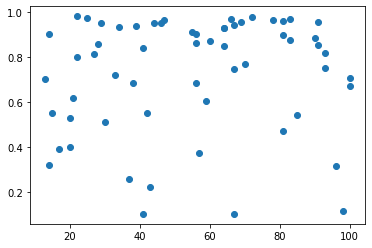

In [52]:
plt.scatter(results['config.epochs'], results['pt_test_acc'])

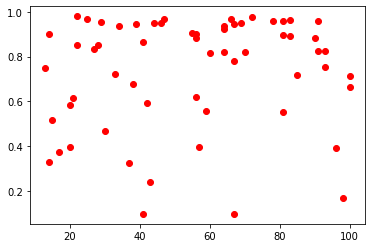

In [53]:
plt.scatter(results['config.epochs'], results['tf_test_acc'], color="red")

### Is Model Resiliency based off epochs?

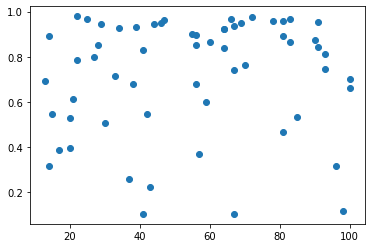

In [54]:
plt.scatter(results['config.epochs'], results['average_pt_resiliency'])

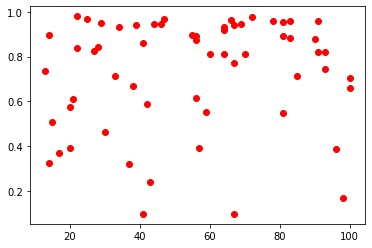

In [55]:
plt.scatter(results['config.epochs'], results['average_tf_resiliency'], color="red")

### Top configurations where test accuracy is high, but resiliency is low

In [56]:
results['average_test_accuracy'] = (results['pt_test_acc']+results['tf_test_acc'])/2

In [57]:
results['average_resiliency'] = (results['average_pt_resiliency']+results['average_tf_resiliency'])/2

In [58]:
results['test_resiliency_diff'] = results['average_test_accuracy'] - results['average_resiliency']

Text(0, 0.5, 'Average Resiliency')

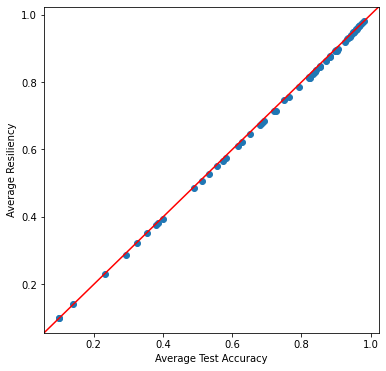

In [59]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(results['average_test_accuracy'], results['average_resiliency'])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")
ax.set_xlabel("Average Test Accuracy")
ax.set_ylabel("Average Resiliency")

In [60]:
high_test_low_res = results.sort_values('test_resiliency_diff', ascending=False)

In [61]:
high_test_low_res.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff
47,eb1f8d26,0.798550,0.783283,0.784994,0.790448,0.018924,0.8509,0.833533,0.835436,0.842113,...,0.091615,0.319694,22,236,0.786242,0.837027,-0.050785,0.824725,0.811634,0.013090
34,30a90c3c,0.812582,0.798440,0.800030,0.804044,0.019347,0.8322,0.820834,0.822144,0.826048,...,0.071979,0.488355,27,207,0.800838,0.823009,-0.022171,0.822391,0.811924,0.010467
10,3642dbd8,0.848116,0.836670,0.837807,0.840500,0.016434,0.8217,0.808852,0.809996,0.814758,...,0.049666,0.676417,64,259,0.838325,0.811202,0.027124,0.834908,0.824764,0.010145
40,eb109bea,0.702360,0.691717,0.692617,0.696184,0.010199,0.7485,0.735266,0.736309,0.740655,...,0.095919,0.216144,13,132,0.693506,0.737410,-0.043904,0.725430,0.715458,0.009972
45,eb1c50a2,0.910688,0.900096,0.901327,0.900280,0.002203,0.9038,0.895045,0.895968,0.891483,...,0.051195,0.225093,55,122,0.900568,0.894165,0.006402,0.907244,0.897366,0.009878


In [81]:
results['average_spatial_accuracy'] = (results['pt_spatial_accuracy']+results['tf_spatial_accuracy'])/2

(0.0, 1.0)

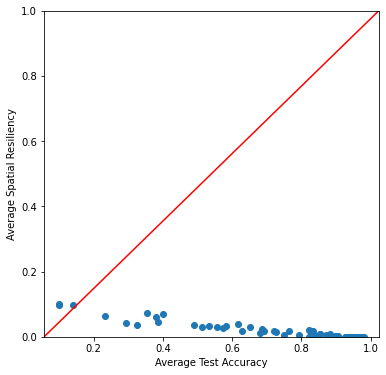

In [85]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(results['average_test_accuracy'], results['average_spatial_accuracy'])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")
ax.set_xlabel("Average Test Accuracy")
ax.set_ylabel("Average Spatial Resiliency")

(0.0, 1.0)

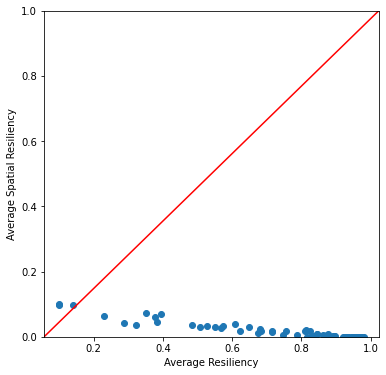

In [87]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(results['average_resiliency'], results['average_spatial_accuracy'])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")
ax.set_xlabel("Average Resiliency")
ax.set_ylabel("Average Spatial Resiliency")
ax.set_ylim(0, 1)